# In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [2]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [50]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=True, index_col='Month')
series.dropna(inplace=True)

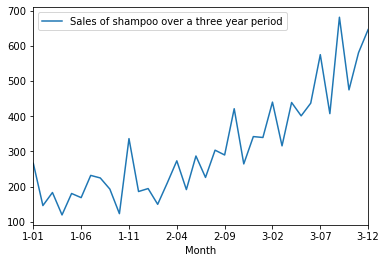

In [51]:
series.plot()
pyplot.show()

From here we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require differencing to make it stationary.

In [52]:
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [53]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [54]:
train, test = X[0:size], X[size:len(X)]

In [56]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964498, expected=421.600000
predicted=290.313716, expected=264.500000
predicted=349.117734, expected=342.300000
predicted=306.513002, expected=339.700000
predicted=387.376436, expected=440.400000
predicted=348.154209, expected=315.900000
predicted=386.308798, expected=439.300000
predicted=356.082063, expected=401.300000
predicted=446.379484, expected=437.400000
predicted=394.737309, expected=575.500000
predicted=434.915469, expected=407.600000
predicted=507.923369, expected=682.000000
predicted=435.482710, expected=475.300000
predicted=652.743868, expected=581.300000
predicted=546.343505, expected=646.900000
Test MSE: 7547.808


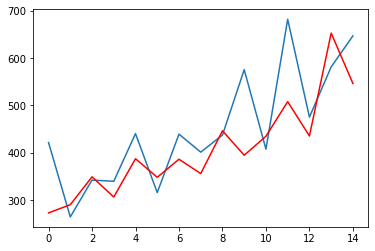

In [57]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
